# Initial test to run ECmean4 functions within the AQUA framework

We load the AQUA routines, keeping in mind that we need to adjust some path

In [3]:
from aqua import Reader

Open a small cluster to speed up the operations with dask (not required)

In [ ]:
# from dask.distributed import LocalCluster, Client, progress
# processes = False
# nworker = 2
# ncpu = 2
# threads = ncpu // nworker
# print(f"Number of CPUs: {ncpu}, number of threads: {threads}, number of workers: {nworker}, processes: {processes}")
# client = Client(processes=processes,
#  threads_per_worker=threads,
#  n_workers=nworker,
#  memory_limit='64GB'
#  )

: 

: 

Start loading the ecmean functions, define the years of the experiments and experiment name

In [4]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices
from wand.image import Image as WImage # to open PDFs in jupyter

model = 'IFS'
exp = 'tco2559-ng5'
year1 = 2020
year2 = 2020
numproc = 1
interface = 'IFS+NEMO'
config = 'config.yml'

# areas false is needed since this is not used by ECmean and can create some issue
reader = Reader(model=model, exp=exp, source="lra-r100-mon", areas=False)
data = reader.retrieve(fix=False)
data


<xarray.Dataset>
Dimensions:  (time: 49, lat: 180, lon: 360, level: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-25T21:00:00 ... 2021-01-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * level    (level) int64 1 10 30 50 70 100 150 ... 875 900 925 950 975 1000
Data variables: (12/14)
    2t       (time, lat, lon) float64 dask.array<chunksize=(5, 180, 360), meta=np.ndarray>
    e        (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(5, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(5, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(5, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(5, 180, 360), meta=np.ndarray>
    ...       ...
    sss      (time, lat, lon) float64 dask.array<chunksize=(7, 180, 360), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(7, 180, 360), meta=np.ndarray>
    tp       (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    tsr      (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    ttr      (time, lat, lon) float64 dask.array<chunksize=(6, 180, 360), meta=np.ndarray>
    u        (time, level, lat, lon) float64 dask.array<chunksize=(4, 23, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-04-12 18:09:12 retrieved by AQUA fixer;\n

# Global Mean
Basic call to global mean, creating a dumb interface file for IFS/NEMO and working directly on the 1x1 files

In [5]:
global_mean(exp, year1, year2, numproc = numproc, config = config, 
            interface = 'interface_' + interface + '.yml', loglevel = 'warning', xdataset = data)

Welcome to ECmean4: Running %s! global_mean


Average pme ALL Global 0.06975261304787371
Average net_toa ALL Global 2.84261688298912
Average tas ALL Global 9.972965855426992
Average psl ALL Global 1012.0813771790124
Average pr ALL Global 3.009678722389721
Average evspsbl ALL Global -2.9399261093418487
Average cll ALL Global 0.3876549484213644
Average clm ALL Global 0.23854241767420375
Average clh ALL Global 0.392484414594785
Average rsnt ALL Global 243.09287690318814
Average rlnt ALL Global -240.25026002019874


Average sos ALL Global 34.741037831559765


Done in 2.8834 seconds
/work/bb1153/b382076/ecmean/tables/global_mean_tco2559-ng5_IFS+NEMO_r1i1p1f1_2020_2020.txt
Postproc done in 2.2673 seconds


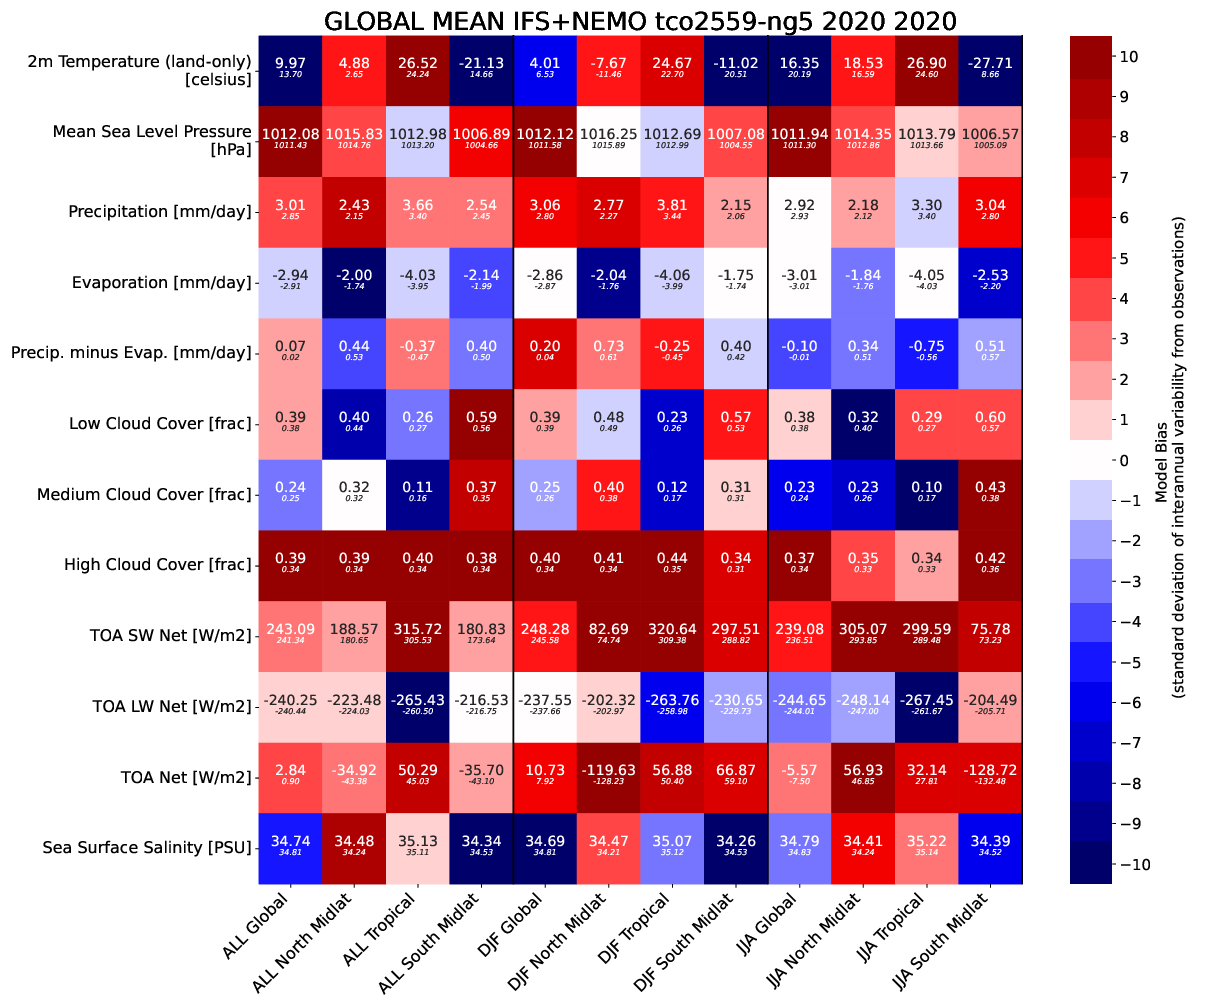

In [6]:
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/global_mean_{exp}_IFS+NEMO_r1i1p1f1_{year1}_{year2}.pdf')
img

# Performance indices
Basic call to performance indices

In [7]:
performance_indices(exp, year1, year2, numproc = numproc, config = config, 
            interface = 'interface_' + interface + '.yml', loglevel = 'info', xdataset = data)

Welcome to ECmean4: Running %s! performance_indices


/work/bb1153/b382076/mambaforge/envs/aqua-ecmean/lib/python3.10/site-packages/xarray/core/dataarray.py:854: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


Preproc in 6.4754 seconds
PI for Global ALL tas 28.506
PI for Global DJF tas 13.937
PI for Global JJA tas 27.218
PI for Global ALL pr 5.448
PI for Global DJF pr 3.451
PI for Global JJA pr 5.181
PI for Global ALL psl 3.152
PI for Global DJF psl 1.549
PI for Global JJA psl 2.83
PI for Global ALL sos 8.158
PI for Global DJF sos 6.176
PI for Global JJA sos 6.789


Done in 1.8571 seconds with 1 processors
Postproc done in 0.7477 seconds


Open the obtained txt file

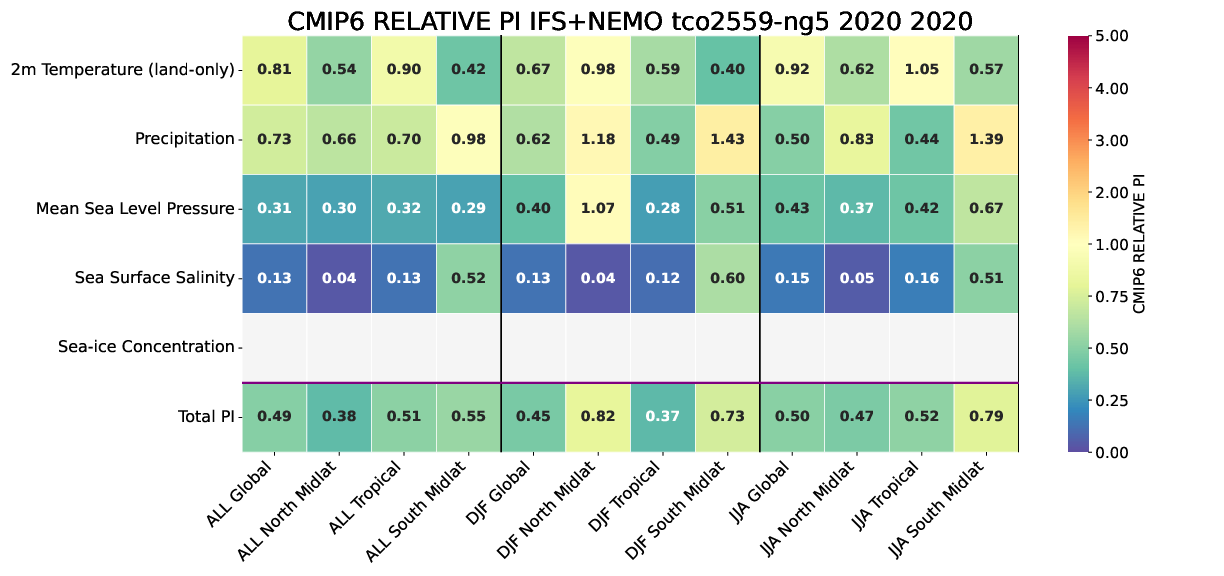

In [8]:
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/PI4_EC23_{exp}_IFS+NEMO_r1i1p1f1_{year1}_{year2}.pdf')
img